<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/10%20-%20Classification2%20/Exercises/%20Exercises_Classification2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification 2: Solution to exercise

## KNN and Decision Trees

In this lab we will K Nearest Neighbor and Decision Trees for classification.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
np.random.seed = 72

### Load data

We will start with the `heart disease` dataset from last week. Here's a description of the attributes in the data-set:

> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. target: 1: presence 0: absence of a heart disease

In [ ]:
# data-set: heart.csv
df = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,M,D,145,233,yes,A,150,no,1
1,37,M,C,130,250,no,B,187,no,1
2,41,F,B,130,204,no,A,172,no,1
3,56,M,B,120,236,no,B,178,no,1
4,57,F,A,120,354,no,B,163,yes,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

### K-neirest neighbor classification

Let's start with only 2 features: age and maximum heart rate achieved (thalach). Define your features and target variable. 

In [ ]:
X = np.array(df[["age", "thalach"]])
y = np.array(df["target"])

Split your data set into train and test subsets. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

Define your model. Try to use a logistic regression with cross validation (cv = 5). 

In [ ]:
#Create model
model = KNeighborsClassifier(3)

Fit your model now using the train set. 

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Compare your train and test accuracy for your model.

In [ ]:
# train accuracy with CV
model.score(X_train,y_train)

0.7892561983471075

In [ ]:
# test accuracy with CV
model.score(X_test, y_test)

0.6721311475409836

Calculate the base rate

In [ ]:
#Compute the base rate
#Base rate = (most frequent class)/(total observations)

nbr_heart_disease = df.loc[df["target"] == 1].shape[0]
print("#Heart disease = ", nbr_heart_disease)

nbr_no_heart_disease = df.loc[df["target"] == 0].shape[0]
print("#No heart disease = ", nbr_no_heart_disease)

print("Baserate = ", max(nbr_heart_disease, nbr_no_heart_disease)/(nbr_heart_disease+ nbr_no_heart_disease))

#Heart disease =  165
#No heart disease =  138
Baserate =  0.5445544554455446


Show the confusion matrix

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, model.predict(X_train))


array([[95, 20],
       [31, 96]])

For which K (number of neighbors), p-value and weight do we obtain the best accurary?

In [ ]:
n_neighbors = [2,3,4,5,6,7]
p_values = [1,2,3]
weights = ['uniform', 'distance']
for n in n_neighbors:
    for p in p_values:
        for w in weights:
            model = KNeighborsClassifier(n_neighbors=n, p=p, weights=w)
            model.fit(X_train, y_train)
            print("accuracy for k = " + str(n) + ", p = " + str(p) + ", weight = " + w + " : " + str(model.score(X_test, y_test)))

accuracy for k = 2, p = 1, weight = uniform : 0.5901639344262295
accuracy for k = 2, p = 1, weight = distance : 0.6557377049180327
accuracy for k = 2, p = 2, weight = uniform : 0.5901639344262295
accuracy for k = 2, p = 2, weight = distance : 0.6885245901639344
accuracy for k = 2, p = 3, weight = uniform : 0.5901639344262295
accuracy for k = 2, p = 3, weight = distance : 0.6885245901639344
accuracy for k = 3, p = 1, weight = uniform : 0.6229508196721312
accuracy for k = 3, p = 1, weight = distance : 0.6557377049180327
accuracy for k = 3, p = 2, weight = uniform : 0.6721311475409836
accuracy for k = 3, p = 2, weight = distance : 0.6885245901639344
accuracy for k = 3, p = 3, weight = uniform : 0.6557377049180327
accuracy for k = 3, p = 3, weight = distance : 0.6721311475409836
accuracy for k = 4, p = 1, weight = uniform : 0.5573770491803278
accuracy for k = 4, p = 1, weight = distance : 0.6885245901639344
accuracy for k = 4, p = 2, weight = uniform : 0.5737704918032787
accuracy for k = 4

Now, let's try to predict the class and probability of correct classification for Age = 50, Thalach = 130 and Age = 70, Thalach = 160

In [ ]:
print(model.predict([[50,130],[70,160]]))
print(model.predict_proba([[50,130],[70,160]]))

[0 1]
[[0.88872074 0.11127926]
 [0.44389399 0.55610601]]


Now let's try more numerical features and see if the accuracy improuves.
We will use now "age", "thalach", "trestbps" and "chol". 
Define your features and your target variable. 

In [ ]:
X = df[["age", "thalach", "trestbps", "chol"]]
y = df["target"]

Split your data set into train and test subsets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

Standardize your data. 

In [ ]:
standardize = StandardScaler()
standardize.fit(X_train, y_train)

StandardScaler()

In [ ]:
X_train = standardize.transform(X_train)
X_test = standardize.transform(X_test)

Fit your model using the train data. Let's use the logistic regression with cross validation here. 

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=3, weights='distance')

Compare your train and test accurary. 

In [ ]:
# train accuracy
model.score(X_train,y_train)

1.0

In [ ]:
# test accuracy
model.score(X_test, y_test)

0.639344262295082

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, model.predict(X_train))

array([[115,   0],
       [  0, 127]])

### Decision tree classification

We will now use the decision tree algorithm for classification.

Import the necessary libraries for decision tree classification, define the model and train your model. The test it. What is the accuracy of your model (using the test set)?

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7704918032786885


How can you improve your model? Find the lowest depth with for an accuracy of 1. 

In [ ]:
#fonction to find lowest depth (less complicated model) keeping an accuracy of 1
depth = 5
model = DecisionTreeClassifier(max_depth = depth)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
while accuracy == 1:
    depth -= 1
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
print(depth+1)

6


Plot the decision tree and the decision boundaries for a model using 'age' and 'thalach' as features. How do you interpret these visualisations?

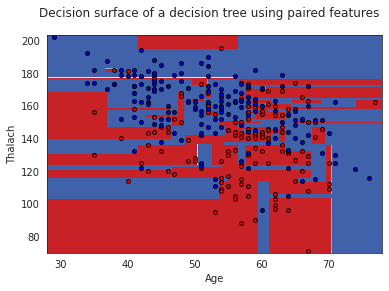

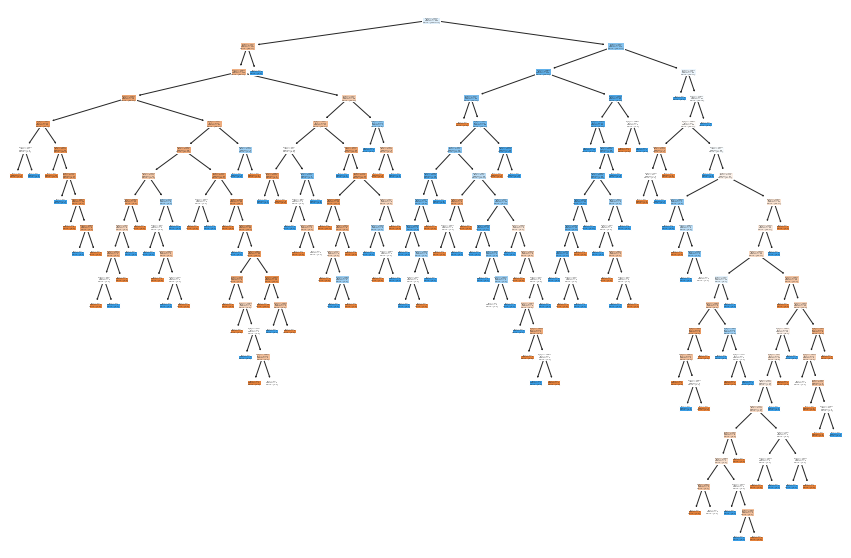

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

plot_colors = "rb"
plot_step = 0.02


X = X[['age', 'thalach']].values

clf = DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel('Age')
plt.ylabel('Thalach')

# Plot the training points
for i, color in zip(range(2), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.axis("tight")

plt.figure(figsize=(15,10))
clf = DecisionTreeClassifier().fit(X, y)
plot_tree(clf, filled=True)
plt.show()